In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# The current version of seaborn generates a bunch of warnings that we'll ignore
import warnings 
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

!pip install imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Load the dataset
data = pd.read_csv('/content/gdrive/My Drive/Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
# No Null Values in dataframe!
print(data.isnull().sum().sum())

0


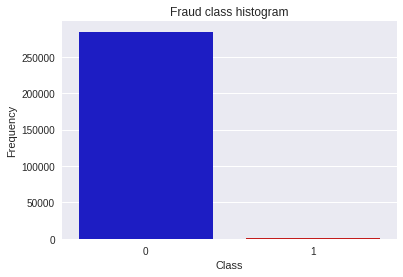

In [0]:
# Evaluate the target/response variable
import seaborn as sns
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=data, palette=colors)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [0]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(sum(data['Class'] == 0)/len(data)*100,2), '% of the dataset')
print('Frauds', round(sum(data['Class'] != 0)/len(data)*100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


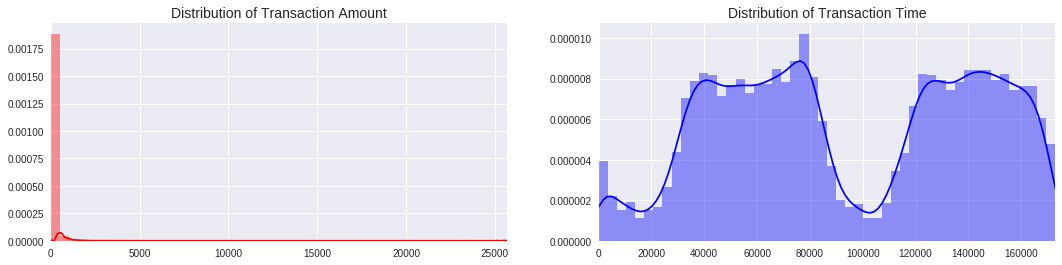

In [0]:
'''
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'). 
'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax1, color='r')
ax1.set_title('Distribution of Transaction Amount', fontsize=14)
ax1.set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax2, color='b')
ax2.set_title('Distribution of Transaction Time', fontsize=14)
ax2.set_xlim([min(time_val), max(time_val)])

plt.show()

In [0]:
# Normalize the "Amount" column. 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


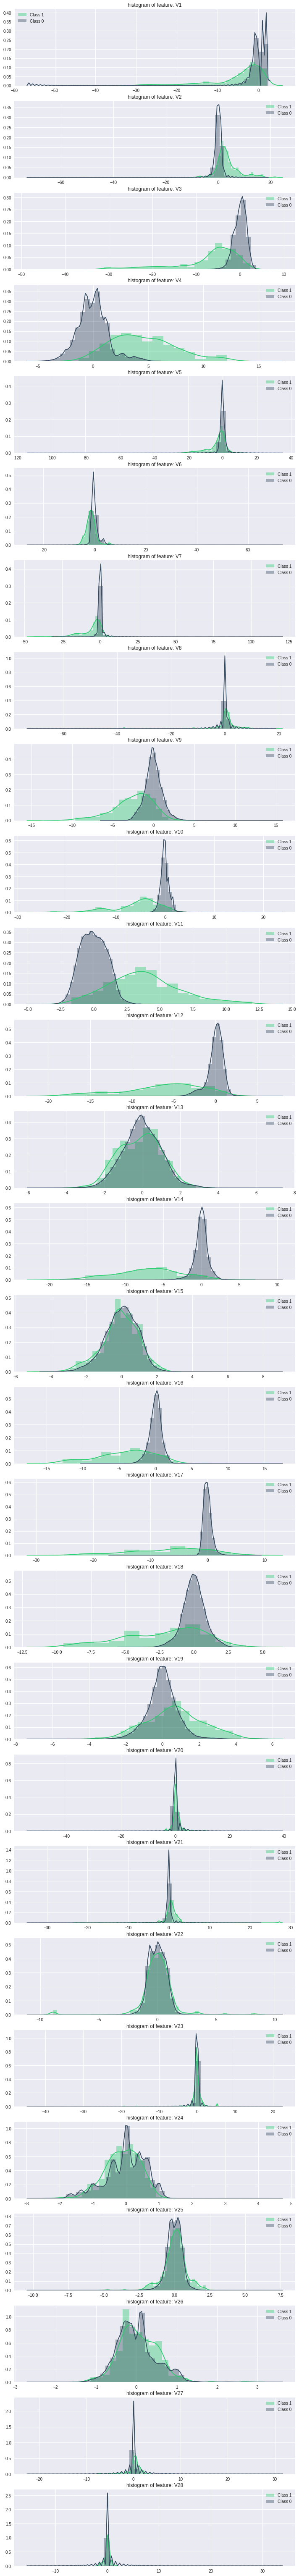

In [0]:
# We can see that some features have very similar distributions (completely overlap) between the two types of transactions.
# V8, V13, V15, V20, V22, V23, V24, V25, V26, V27, V28 do not really help us to differentiate between classes
vfeatures = data.columns.tolist()[1:29]
f, ax = plt.subplots(nrows=28, ncols=1, figsize=(12,28*4))
for i, cn in enumerate(data[vfeatures]):
    sns.distplot(data[data['Class'] == 1][cn], ax=ax[i], color='#2ecc71')
    sns.distplot(data[data['Class'] == 0][cn], ax=ax[i], color='#34495e')
    ax[i].legend(['Class 1','Class 0'])
    ax[i].set_xlabel('')
    ax[i].set_title('histogram of feature: ' + str(cn))
plt.show()    

**Create undersample data using our original dataframe**


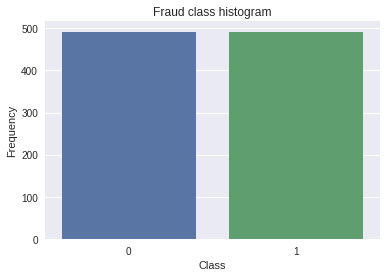

In [0]:
# There are 492 cases of fraud in our train dataset. We then randomly select 492 cases of non-fraud transactions to create new sub-sample.
# We concat the 492 cases of fraud and 492 cases of non fraud, creating a new sub-sample.

# Number of transactions which are Fraud
no_frauds = len(data[data.Class == 1])

# Indices of non fraud transactions
non_fraud_indices = data[data.Class == 0].index

# Generate random samples from non fraud transactions
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)

# Find the indices of fraud samples
fraud_indices = data[data.Class == 1].index

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample_data = data.loc[under_sample_indices]

import seaborn as sns
ax = sns.countplot(x="Class", data=under_sample_data)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

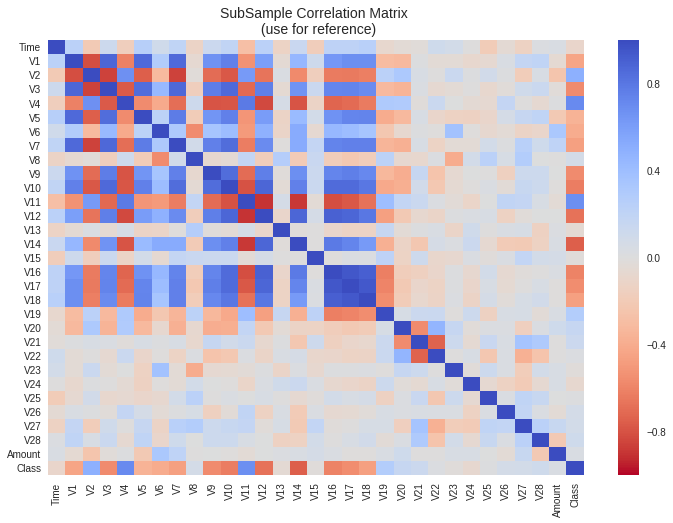

In [0]:
'''
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. 
Summary and Explanation:
Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. 
'''
# Make sure we use the subsample in our correlation
f, ax = plt.subplots(1, 1, figsize=(12,8))

# Subsample DataFrame
corr = under_sample_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

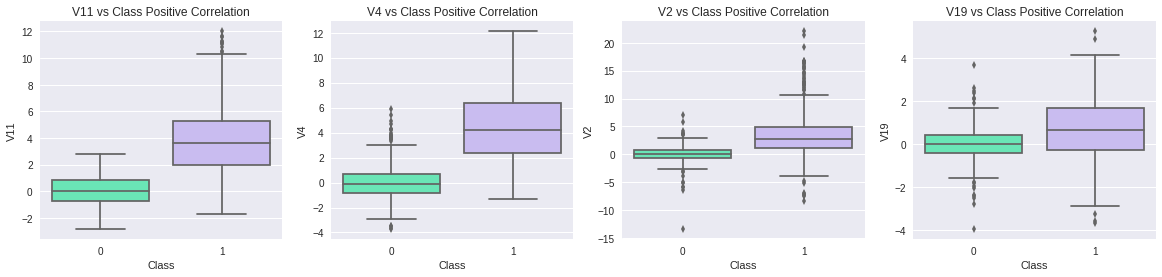

In [0]:
# Positive correlations (The higher the feature value the more likely it will be a fraud transaction)
colors = ['#56F9BB', '#C5B3F9']
f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=under_sample_data, palette=colors, ax=ax1)
ax1.set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=under_sample_data, palette=colors, ax=ax2)
ax2.set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=under_sample_data, palette=colors, ax=ax3)
ax3.set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=under_sample_data, palette=colors, ax=ax4)
ax4.set_title('V19 vs Class Positive Correlation')

plt.show()

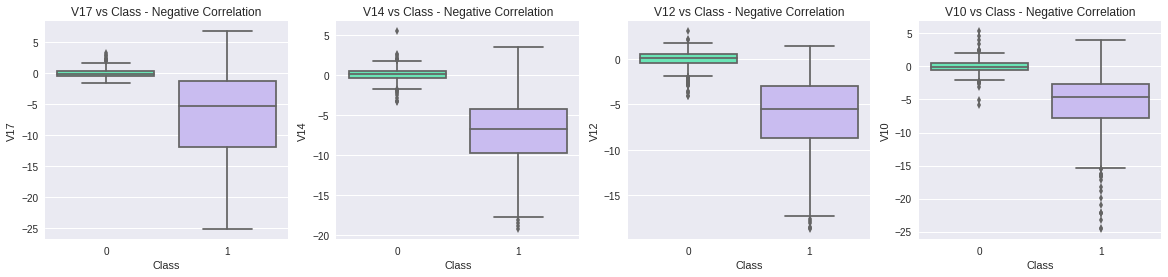

In [0]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
f, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=under_sample_data, palette=colors, ax=ax1)
ax1.set_title('V17 vs Class - Negative Correlation')

sns.boxplot(x="Class", y="V14", data=under_sample_data, palette=colors, ax=ax2)
ax2.set_title('V14 vs Class - Negative Correlation')


sns.boxplot(x="Class", y="V12", data=under_sample_data, palette=colors, ax=ax3)
ax3.set_title('V12 vs Class - Negative Correlation')


sns.boxplot(x="Class", y="V10", data=under_sample_data, palette=colors, ax=ax4)
ax4.set_title('V10 vs Class - Negative Correlation')

plt.show()

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   #print("Normalized confusion matrix")
    else:
        1   #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Method 1 - Undersampling before cross validating (prone to overfit)

*   First we fit our model on undersampled data (includes all fraud transactions) and get the best parameters using grid search. 
*   Later on, we will apply the best fit model to test on our original data.
* Here we discard many samples belonging to majority class thus throwing away potential useful information. 
* By undersampling, we can solve the class imbalance issue, and increase the sensitivity of our models. However, results can be poor. A reason could indeed be that we trained our classifiers using few samples belonging to majority class.

In [0]:
# We use our undersampled data to train our model
# Assigning X_undersample and y_undersample
# Assigning X and y. 
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

Classifiers:
* We train two types of classifiers and decide which classifier will be more effective in detecting fraud transactions.

Summary:
* Logistic Regression classifier is more accurate than the SVM classifier.
* GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
* Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

Learnings:

* The first thing we should worry about is underfitting: training performance is bad.
* The next thing we should worry about is overfitting: training performance is good, but test performance is bad. The wider the gap between the training score and the validation score,  the more likely model is overfitting.

 
***Cross-validation***

Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.
Here are the steps involved in cross validation:
       1) You reserve a sample data set
       2) Train the model using the remaining part of the dataset
       3) Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. It rocks!
 
Cross-validation is when you reserve part of your data to use in evaluating your model. There are different cross-validation methods. 
The simplest conceptually is to just take 70% (just making up a number here, it doesn't have to be 70%) of your data and use that for training, and then use the remaining 30% of the data to evaluate the model's performance. 
The reason you need different data for training and evaluating the model is to protect against overfitting. There are other (slightly more involved) cross-validation techniques, of course, like k-fold cross-validation, which often used in practice.

***Grid-Search***

Grid search means you have a set of models (which differ from each other in their parameter values). What you do is you then train each of the models and evaluate it using cross-validation. You then select the one that performed best.
To give a concrete example, if you're using a support vector machine, you could use different values for gamma and C. So, for example, you could have a grid with the following values for (gamma, C): (1, 1), (0.1, 1), (1, 10), (0.1, 10).
It's a grid because it's like a product of [1, 0.1] for gamma and [1, 10] for C. Grid-search would basically train a SVM for each of these four pair of (gamma, C) values, then evaluate it using cross-validation, and select the one that did best.

***predict_proba***

predict_proba gives you the probabilities for the target (0 and 1 in our case) in array form. 
The number of probabilities for each row is equal to the number of categories in target variable (2 in our case).
Suppose we only want the probability of getting the output as 1, we can do some changes in our code and we will get only one output for each observation. We can use the following code:
model.predict_proba(test)[:,1]


Tuned Logistic Regression Parameters: {'C': 100, 'penalty': 'l1'}
Tuned Logistic Regression Estimator: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


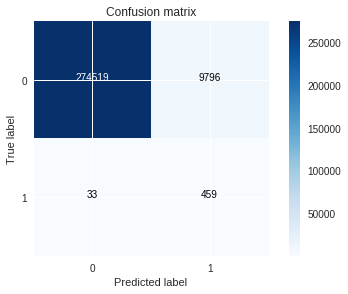

Recall metric in the testing dataset:  0.9329268292682927


In [0]:
# Setup the hyperparameter grid
penalty = ['l1', 'l2']
c_space = [0.01,0.1,1,10,100]
param_grid = {"penalty": penalty, 'C': c_space}

# Create the classifier: logreg
logreg = LogisticRegression()

# Use GridSearchCV to find the best parameters.
# Instantiate the GridSearchCV object: logreg_grid
logreg_grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit the classifier to the training data
logreg_grid.fit(X_undersample, y_undersample.values.ravel())

# Print the best parameters and estimator
print("Tuned Logistic Regression Parameters: {}".format(logreg_grid.best_params_)) 
print("Tuned Logistic Regression Estimator: {}".format(logreg_grid.best_estimator_)) 

# Fit and predict using the best estimator on undersampled test data
optimised_logreg = logreg_grid.best_estimator_
optimised_logreg = optimised_logreg.fit(X_undersample, y_undersample.values.ravel())
logreg_pred = optimised_logreg.predict(X)

# Print Confusion Matrix
class_names = [0,1]
cnf_matrix = confusion_matrix(y.values.ravel(), logreg_pred)
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

# Print Recall
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

**Plotting ROC curve**

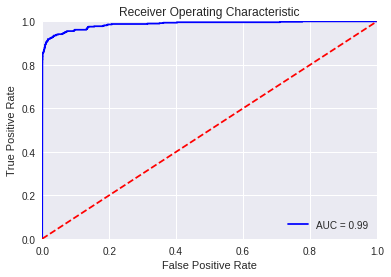

In [0]:
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
probs = optimised_logreg.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned SVC Parameters: {'C': 1, 'kernel': 'linear'}
Tuned SVC Estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


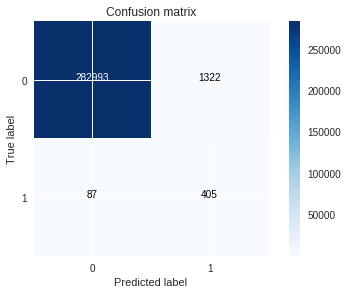

Recall metric in the testing dataset:  0.823170731707317


In [0]:
# Support Vector Classifier
# Setup the hyperparameter grid
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'linear']}

# Create the classifier: logreg
svc = SVC()

# Use GridSearchCV to find the best parameters.
# Instantiate the GridSearchCV object: logreg_grid
svc_grid = GridSearchCV(svc, svc_params, cv=5)

# Fit the classifier to the training data
svc_grid.fit(X_undersample, y_undersample.values.ravel())

# Print the best parameters and estimator
print("Tuned SVC Parameters: {}".format(svc_grid.best_params_)) 
print("Tuned SVC Estimator: {}".format(svc_grid.best_estimator_)) 

# Fit and predict using the best estimator on undersampled test data
optimised_svc = svc_grid.best_estimator_
optimised_svc = optimised_svc.fit(X_undersample, y_undersample.values.ravel())
svc_pred = optimised_svc.predict(X)

# Print Confusion Matrix
class_names = [0,1]
cnf_matrix = confusion_matrix(y.values.ravel(), svc_pred)
plot_confusion_matrix(cnf_matrix, class_names)
plt.show()

# Print Recall
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

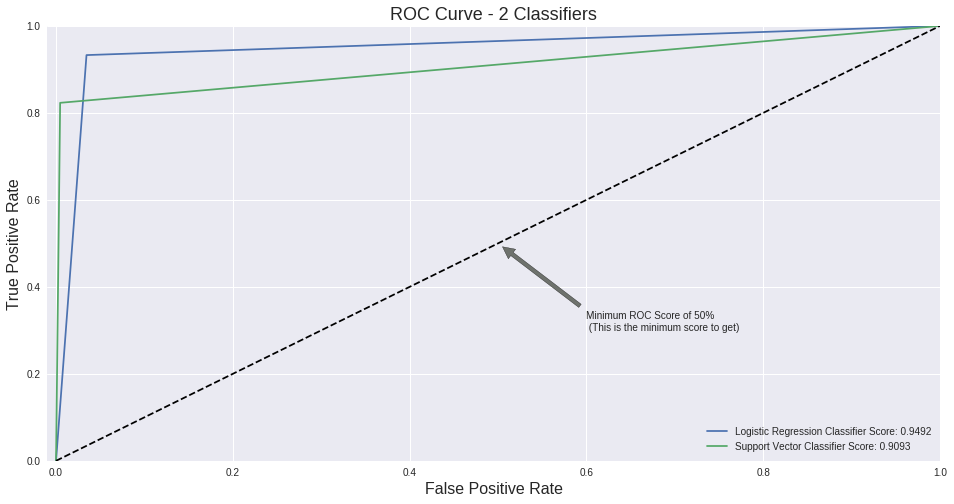

In [0]:
log_fpr, log_tpr, log_thresold = roc_curve(y, logreg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y, svc_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve - 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y, logreg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr)
plt.show()

## Method 2 - Undersampling while cross validating (Not prone to overfit)

* Here we first start cross-validating. This means that at each iteration we first exclude the sample to use as validation set, and then undersample the the majority class samples in training set. 
* The difference from before case, is that clearly now we are not using the same data for training and validation. Therefore we will obtain more representative results. 



In [0]:
'''
We can partition our original dataset into train and test sets using sklearn's "StratifiedShuffleSplit" method with n_split = 1. 
It creates a partition of the data such that each set contains approximately the same percentage of samples of each target class as that of the complete set.
This ensures that there is the same proportion of positive and negative examples in the train and test sets. 
'''

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

X = data.drop('Class', axis=1).values
y = data['Class'].values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_roc_auc = []

# Setup the hyperparameter grid
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the classifier: logreg
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object: logreg_grid
logreg_rand = RandomizedSearchCV(logreg, param_grid, n_iter=4)

# Perform under-sampling based on RandomUnderSampler method.
# Cross validating the right way
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
  undersample_pipeline = imbalanced_make_pipeline(RandomUnderSampler(sampling_strategy='majority'), logreg_rand) # Undersampling happens during Cross Validation not before..
  undersample_model = undersample_pipeline.fit(X[train_idx], y[train_idx])
  optim_logreg = logreg_rand.best_estimator_
  optim_logreg = optim_logreg.fit(X[train_idx], y[train_idx])
  undersample_pred = optim_logreg.predict(X[test_idx])
        
  undersample_accuracy.append(accuracy_score(y[test_idx], undersample_pred))
  undersample_precision.append(precision_score(y[test_idx], undersample_pred))
  undersample_recall.append(recall_score(y[test_idx], undersample_pred))
  undersample_f1.append(f1_score(y[test_idx], undersample_pred))
  undersample_roc_auc.append(roc_auc_score(y[test_idx], undersample_pred))
    
print('---' * 45)
print('')
print('Model Metrics - Validation data:')
print("Accuracy: {}".format(np.mean(undersample_accuracy)))
print("Precision: {}".format(np.mean(undersample_precision)))
print("Recall: {}".format(np.mean(undersample_recall)))
print("F1: {}".format(np.mean(undersample_f1)))
print("ROC-AUC: {}".format(np.mean(undersample_roc_auc)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

Model Metrics - Validation data:
Accuracy: 0.9990800884800393
Precision: 0.7879571467546971
Recall: 0.6428571428571429
F1: 0.7069746598471829
ROC-AUC: 0.8212755748050485
---------------------------------------------------------------------------------------------------------------------------------------


## Method 3 - SMOTE Technique (Over-Sampling while cross validation)

* If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

* First, we start cross-validating. This means that at each iteration we first exclude the sample to use as validation set, and then oversample the remaining of the minority class in training set. 

In [0]:
'''
SMOTE stands for Synthetic Minority Over-sampling Technique. 
Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. 
This is another alternative for solving the "class imbalance problems".

Find the k-nearest-neighbors minority class observations.
At each loop iteration, randomly choose one of the K closest minority class neighbours and a new minority instance is synthesised somewhere between the minority instance and that neighbour.

1) Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
2) Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
3) Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
4) Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
'''
X = data.drop('Class', axis=1).values
y = data['Class'].values

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Setup the hyperparameter grid
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the classifier: logreg
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object: logreg_grid
logreg_rand = RandomizedSearchCV(logreg, param_grid, n_iter=4)

# Implementing Cross Validation follwed by SMOTE  
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), logreg_rand) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X[train_idx], y[train_idx])
    logreg_sm = logreg_rand.best_estimator_
    oversample_pred = logreg_sm.predict(X[test_idx])
    
    accuracy_lst.append(accuracy_score(y[test_idx], oversample_pred))
    precision_lst.append(precision_score(y[test_idx], oversample_pred))
    recall_lst.append(recall_score(y[test_idx], oversample_pred))
    f1_lst.append(f1_score(y[test_idx], oversample_pred))
    auc_lst.append(roc_auc_score(y[test_idx], oversample_pred))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print("ROC-AUC: {}".format(np.mean(auc_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9906463958428425
precision: 0.14493511037829432
recall: 0.9
f1: 0.24948555589847934
ROC-AUC: 0.9454013083849183
---------------------------------------------------------------------------------------------------------------------------------------


## Future Work


*   class_weight
*   adaboost
*   tomek link